# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [39]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


In [3]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [5]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [8]:
fraud.shape

(1000000, 8)

In [6]:
#Numero de duplicados
fraud.duplicated().sum()

0

In [9]:
#Formateo de tipos de datos
# Variables categoricas 
# ( floats a integers)
int_columns = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']
fraud[int_columns] = fraud[int_columns].astype(int)
# ( integers a categories)
categoricas = ['repeat_retailer', 'used_chip','used_pin_number', 'online_order', 'fraud']
fraud[categoricas] = fraud[categoricas].astype('category')

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

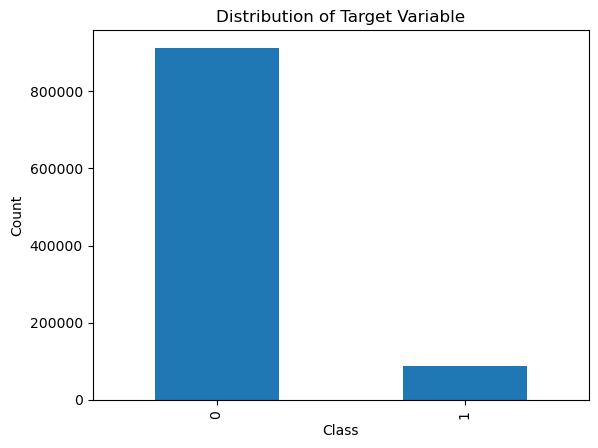

In [19]:
#Balance variable target
target_counts = fraud['fraud'].value_counts()
target_counts.plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [16]:
# Calcular la distribución de las clases
target_counts = fraud['fraud'].value_counts()

# Comprobar si el conjunto de datos está equilibrado
# Consideramos que está equilibrado si ambas clases tienen al menos el 50% del total
total_count = target_counts.sum()
class_proportions = target_counts / total_count

# Comprobar si ambas clases tienen al menos el 50%
is_balanced = all(class_proportions >= 0.5)

print(f"Is the dataset balanced? {is_balanced}")


Is the dataset balanced? False


- **2.** Train a LogisticRegression.

In [25]:
#Creacion de variables dummies
df_withdummy = pd.get_dummies(fraud, columns=['repeat_retailer', 'used_chip','used_pin_number', 'online_order'])
df_withdummy.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,fraud,repeat_retailer_0,repeat_retailer_1,used_chip_0,used_chip_1,used_pin_number_0,used_pin_number_1,online_order_0,online_order_1
0,57.877857,0.311140,1.945940,0,False,True,False,True,True,False,True,False
1,10.829943,0.175592,1.294219,0,False,True,True,False,True,False,True,False
2,5.091079,0.805153,0.427715,0,False,True,True,False,True,False,False,True
3,2.247564,5.600044,0.362663,0,False,True,False,True,True,False,False,True
4,44.190936,0.566486,2.222767,0,False,True,False,True,True,False,False,True


In [26]:
# Splitting the dataset
X = df_withdummy.drop('fraud', axis=1)
y = df_withdummy['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [27]:
# Escalar con RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [40]:
# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

In [41]:
y_pred_original = model.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original)
roc_auc_original = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("Modelo Original:")
print(f"Accuracy: {accuracy_original:.4f}, F1 Score: {f1_original:.4f}, ROC AUC: {roc_auc_original:.4f}")


Modelo Original:
Accuracy: 0.9594, F1 Score: 0.7218, ROC AUC: 0.8788


In [49]:
metrics_original = {'Accuracy': accuracy_original,'F1 Score': f1_original,'ROC AUC': roc_auc_original}

- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 

In [42]:
# Oversample the minority class
ros = RandomOverSampler(random_state=123)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

# Train model with balanced data
model.fit(X_resampled, y_resampled)

# Evaluate model
y_pred_oversampled = model.predict(X_test_scaled)
print("Oversampling Results:")
accuracy_oversampled = accuracy_score(y_test, y_pred_oversampled)
f1_oversampled = f1_score(y_test, y_pred_oversampled)
roc_auc_oversampled = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("\nModelo con Oversampling:")
print(f"Accuracy: {accuracy_oversampled:.4f}, F1 Score: {f1_oversampled:.4f}, ROC AUC: {roc_auc_oversampled:.4f}")

Oversampling Results:

Modelo con Oversampling:
Accuracy: 0.9350, F1 Score: 0.7177, ROC AUC: 0.8373


In [54]:
metrics_oversampling = {'Accuracy': accuracy_oversampled,'F1 Score': f1_oversampled,'ROC AUC': roc_auc_oversampled}

In [43]:
# Comprobar mejora
improved_oversampling = accuracy_oversampled > accuracy_original
print(f"Mejora con Oversampling: {improved_oversampling}")

Mejora con Oversampling: False


- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [45]:

# Undersample the majority class
rus1 = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus1.fit_resample(X_train_scaled, y_train)

# Train model with balanced data
model.fit(X_undersampled, y_undersampled)

# Evaluate model
y_pred_undersampled = model.predict(X_test_scaled)

accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)
f1_undersampled = f1_score(y_test, y_pred_undersampled)
roc_auc_undersampled = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("\nModelo con Undersampling:")
print(f"Accuracy: {accuracy_undersampled:.4f}, F1 Score: {f1_undersampled:.4f}, ROC AUC: {roc_auc_undersampled:.4f}")


Modelo con Undersampling:
Accuracy: 0.9345, F1 Score: 0.7163, ROC AUC: 0.8363


In [53]:
metrics_undersampling = {'Accuracy': accuracy_undersampled,'F1 Score': f1_undersampled,'ROC AUC': roc_auc_undersampled}

In [46]:
# Comprobar mejora con Undersampling
improved_undersampling = accuracy_undersampled > accuracy_original
print(f"Mejora con Undersampling: {improved_undersampling}")

Mejora con Undersampling: False


- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [47]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

# Train model with balanced data
model.fit(X_smote, y_smote)

# Evaluate model
y_pred_smote = model.predict(X_test_scaled)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("\nModelo con SMOTE:")
print(f"Accuracy: {accuracy_smote:.4f}, F1 Score: {f1_smote:.4f}, ROC AUC: {roc_auc_smote:.4f}")


Modelo con SMOTE:
Accuracy: 0.9350, F1 Score: 0.7177, ROC AUC: 0.8374


In [52]:
metrics_smote = {'Accuracy': accuracy_smote,'F1 Score': f1_smote,'ROC AUC': roc_auc_smote}

In [48]:
#  Comprobar mejora con SMOTE
improved_smote = accuracy_smote > accuracy_original
print(f"Mejora con SMOTE: {improved_smote}")

Mejora con SMOTE: False


In [59]:
# Crear un diccionario con las métricas
metrics = {
    'Model': ['Original', 'Oversampling', 'Undersampling', 'SMOTE'],
    'Accuracy': [
        metrics_original['Accuracy'], 
        metrics_oversampling['Accuracy'], 
        metrics_undersampling['Accuracy'], 
        metrics_smote['Accuracy']
    ],
    'F1 Score': [
        metrics_original['F1 Score'], 
        metrics_oversampling['F1 Score'], 
        metrics_undersampling['F1 Score'], 
        metrics_smote['F1 Score']
    ],
    'ROC AUC': [
        metrics_original['ROC AUC'], 
        metrics_oversampling['ROC AUC'], 
        metrics_undersampling['ROC AUC'], 
        metrics_smote['ROC AUC']
    ]
}

# Crear un DataFrame
results_df = pd.DataFrame(metrics)

# Calcular un puntaje global promediando las métricas
results_df['Global Score'] = results_df[['Accuracy', 'F1 Score', 'ROC AUC']].mean(axis=1)

# Función para determinar si es mejor que el original
results_df['Is Better than Original'] = results_df['Global Score'].apply(
    lambda x: "Sí, es mejor" if x > results_df['Global Score'].iloc[0] else "No, no es mejor"
)

results_df


,Model,Accuracy,F1 Score,ROC AUC,Global Score,Is Better than Original
0,Original,0.95935,0.721766,0.878808,0.853308,"No, no es mejor"
1,Oversampling,0.93500,0.717698,0.837297,0.829998,"No, no es mejor"
2,Undersampling,0.93452,0.716340,0.836283,0.829048,"No, no es mejor"
3,SMOTE,0.93499,0.717692,0.837408,0.830030,"No, no es mejor"
